In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle
from functools import reduce

In [32]:
f_mumu = uproot.open("/home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_CC.root")
#f_mumu = uproot.open("/home/submit/jakedlee/FCCAnalyzer/end_of_h_bb.root")
#print(f_mumu.keys())
flavour = "cc"

<h1>Cutflow</h1>

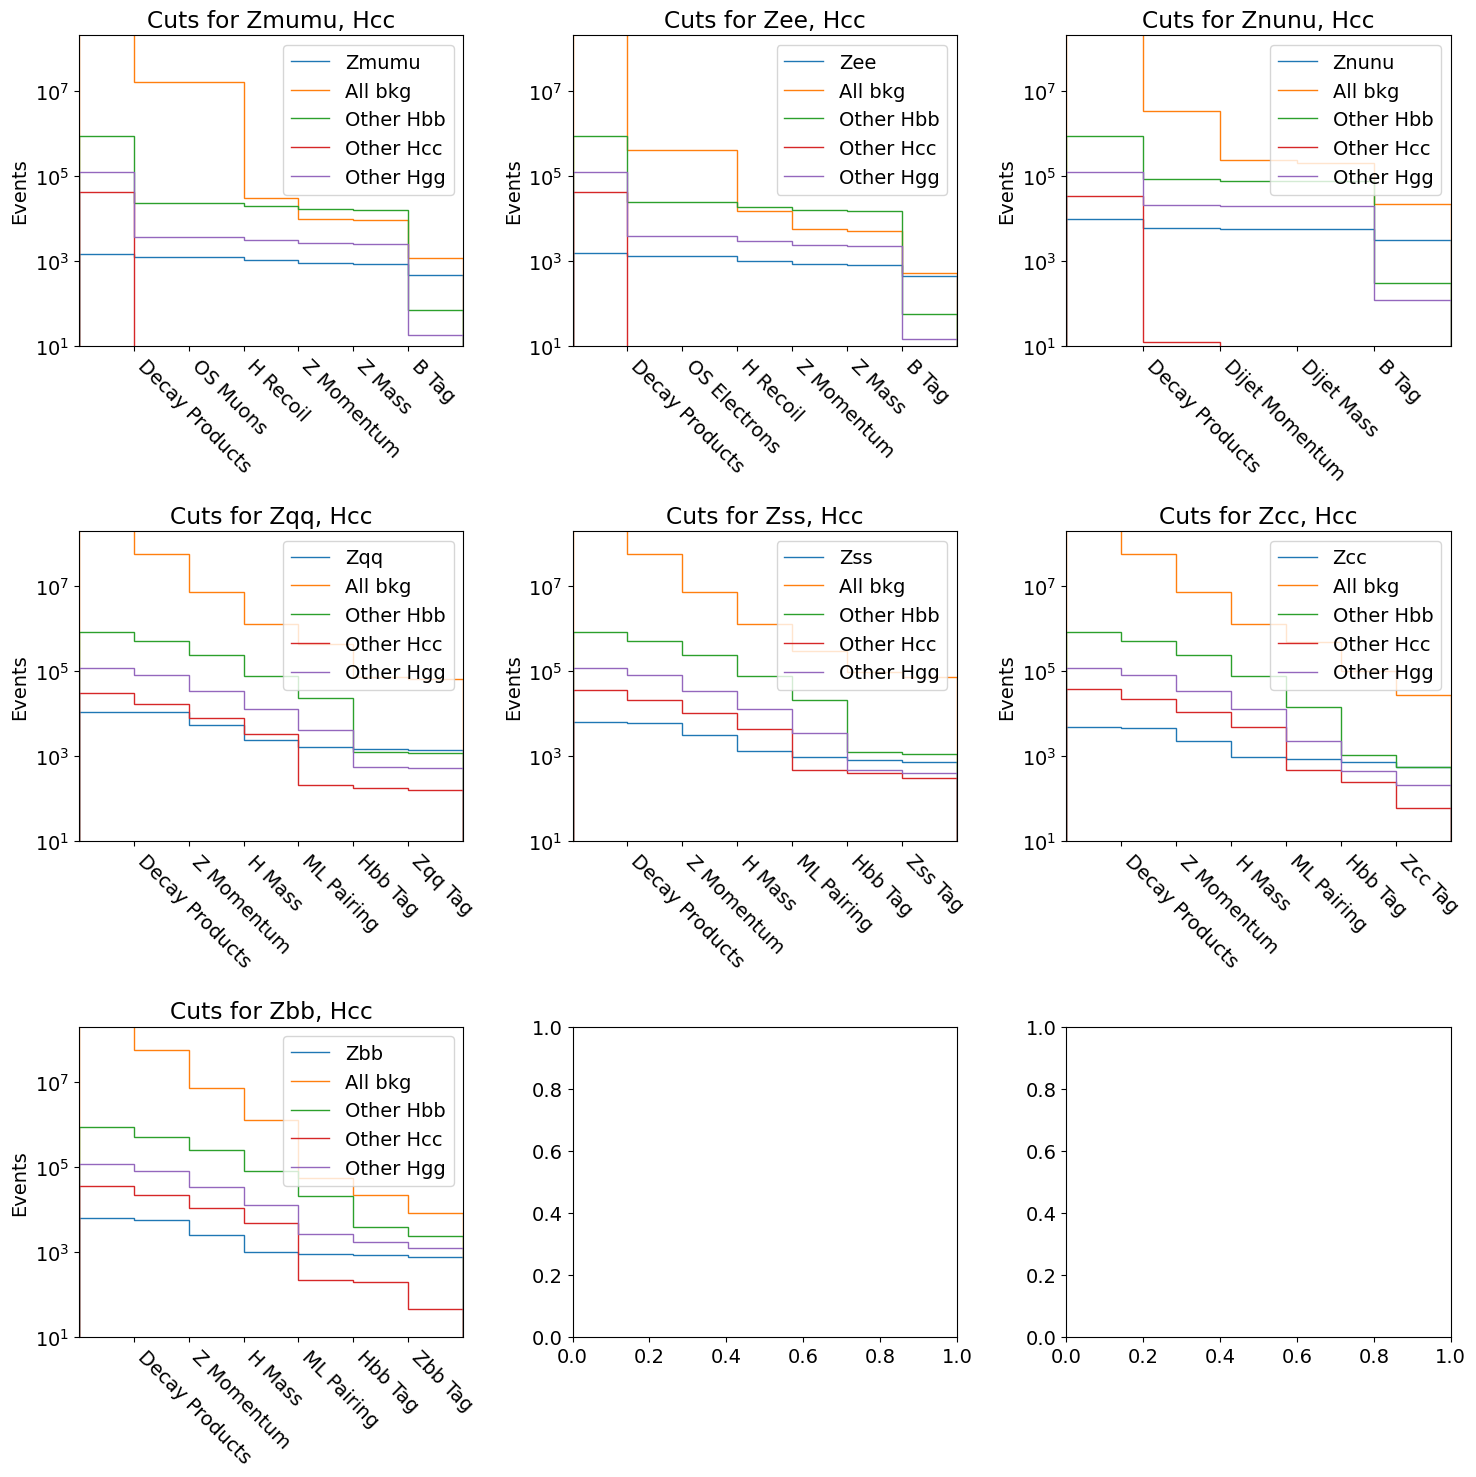

In [33]:
analyses = ['mumu', 'ee', 'nunu', 'qq', 'ss', 'cc', 'bb']

Zprods = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
bb_sig = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in Zprods]
cc_sig = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in Zprods]
gg_sig = [f'wzp6_ee_{i}H_Hgg_ecm240' for i in Zprods]

datasets_bkg = ["p8_ee_WW_ecm240", "p8_ee_ZZ_ecm240", "wzp6_ee_mumu_ecm240", "wzp6_ee_tautau_ecm240", "wzp6_egamma_eZ_Zmumu_ecm240", "wzp6_gammae_eZ_Zmumu_ecm240", "wzp6_gaga_mumu_60_ecm240", "wzp6_gaga_tautau_60_ecm240", "wzp6_ee_nuenueZ_ecm240"]

cols = 3
rows = int(np.ceil(len(analyses) / cols))

# for cut labels
cuts = {}
cuts['mumu'] = ['Decay Products', 'OS Muons', 'H Recoil', 'Z Momentum', 'Z Mass', 'B Tag']
cuts['ee']   = ['Decay Products', 'OS Electrons', 'H Recoil', 'Z Momentum', 'Z Mass', 'B Tag']
cuts['nunu'] = ['Decay Products', 'Dijet Momentum', 'Dijet Mass', 'B Tag']
cuts['qq']   = ['Decay Products', 'Z Momentum', 'H Mass',  'ML Pairing', 'Hbb Tag', 'Zqq Tag']
cuts['ss']   = ['Decay Products', 'Z Momentum', 'H Mass',  'ML Pairing', 'Hbb Tag', 'Zss Tag']
cuts['cc']   = ['Decay Products', 'Z Momentum', 'H Mass',  'ML Pairing', 'Hbb Tag', 'Zcc Tag']
cuts['bb']   = ['Decay Products', 'Z Momentum', 'H Mass',  'ML Pairing', 'Hbb Tag', 'Zbb Tag']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for i in range(rows):
    for j in range(cols):
        if i*cols + j < len(analyses):
            p = analyses[i*cols + j]
        else:
            break
        part = f_mumu[f'wzp6_ee_{p}H_H{flavour}_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        #WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        #ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Bkg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in datasets_bkg])
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',cc_sig)])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',gg_sig)])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        #ax[i][j].stairs(WW.values(), label=f'WW bkg')
        #ax[i][j].stairs(ZZ.values(), label=f'ZZ bkg')
        ax[i][j].stairs(Bkg.values(), label=f'All bkg')
        ax[i][j].stairs(Hbb.values(), label='Other Hbb')
        ax[i][j].stairs(Hcc.values(), label='Other Hcc')
        ax[i][j].stairs(Hgg.values(), label='Other Hgg')
        
        ax[i][j].legend()
        
        ax[i][j].set_yscale('log')
        ax[i][j].set_title(f'Cuts for Z{p}, H{flavour}')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))
        ax[i][j].set_ylim(10, 2e8)

plt.tight_layout()
plt.show()

Graph cuts specifically for Z->leps:

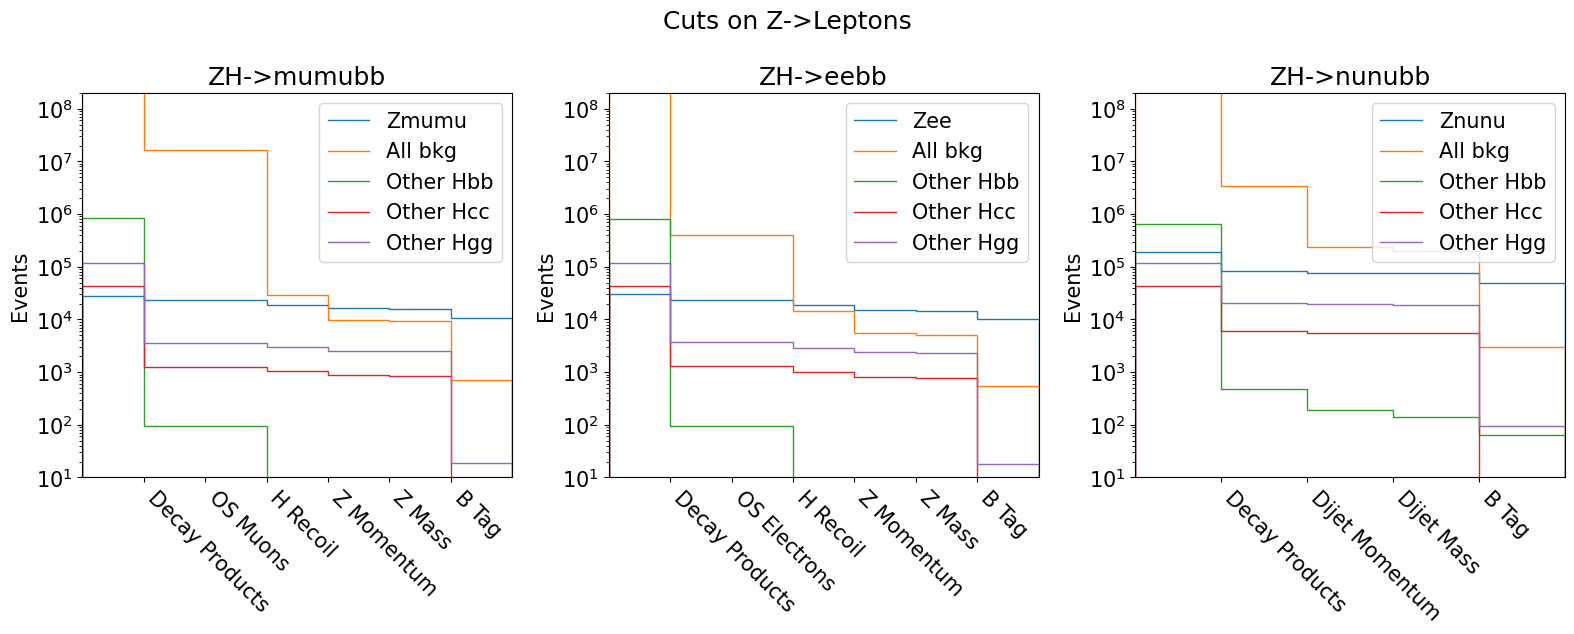

In [16]:
prods = ['mumu', 'ee', 'nunu', 'qq']

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 3, figsize=(16,6.5))

for i in range(3):
        p = prods[i]
        
        part = f_mumu[f'wzp6_ee_{p}H_H{flavour}_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        #WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        #ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Bkg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in datasets_bkg])
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',cc_sig)])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',gg_sig)])
        
        ax[i].stairs(part.values(), label=f'Z{p}')
        #ax[i].stairs(WW.values(), label='WW bkg')
        #ax[i].stairs(ZZ.values(), label='ZZ bkg')
        ax[i].stairs(Bkg.values(), label=f'All bkg')
        ax[i].stairs(Hbb.values(), label='Other Hbb')
        ax[i].stairs(Hcc.values(), label='Other Hcc')
        ax[i].stairs(Hgg.values(), label='Other Hgg')
        
        ax[i].legend(loc='upper right')
        ax[i].set_yscale('log')
        ax[i].set_ylim(10, 2e8)
        ax[i].set_title(f'ZH->{p}{flavour}')
        ax[i].set_ylabel('Events')
        ax[i].set_xlabel('')
        ax[i].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Leptons')
plt.tight_layout()
plt.show()

Graph cuts specifically for Z->quarks:

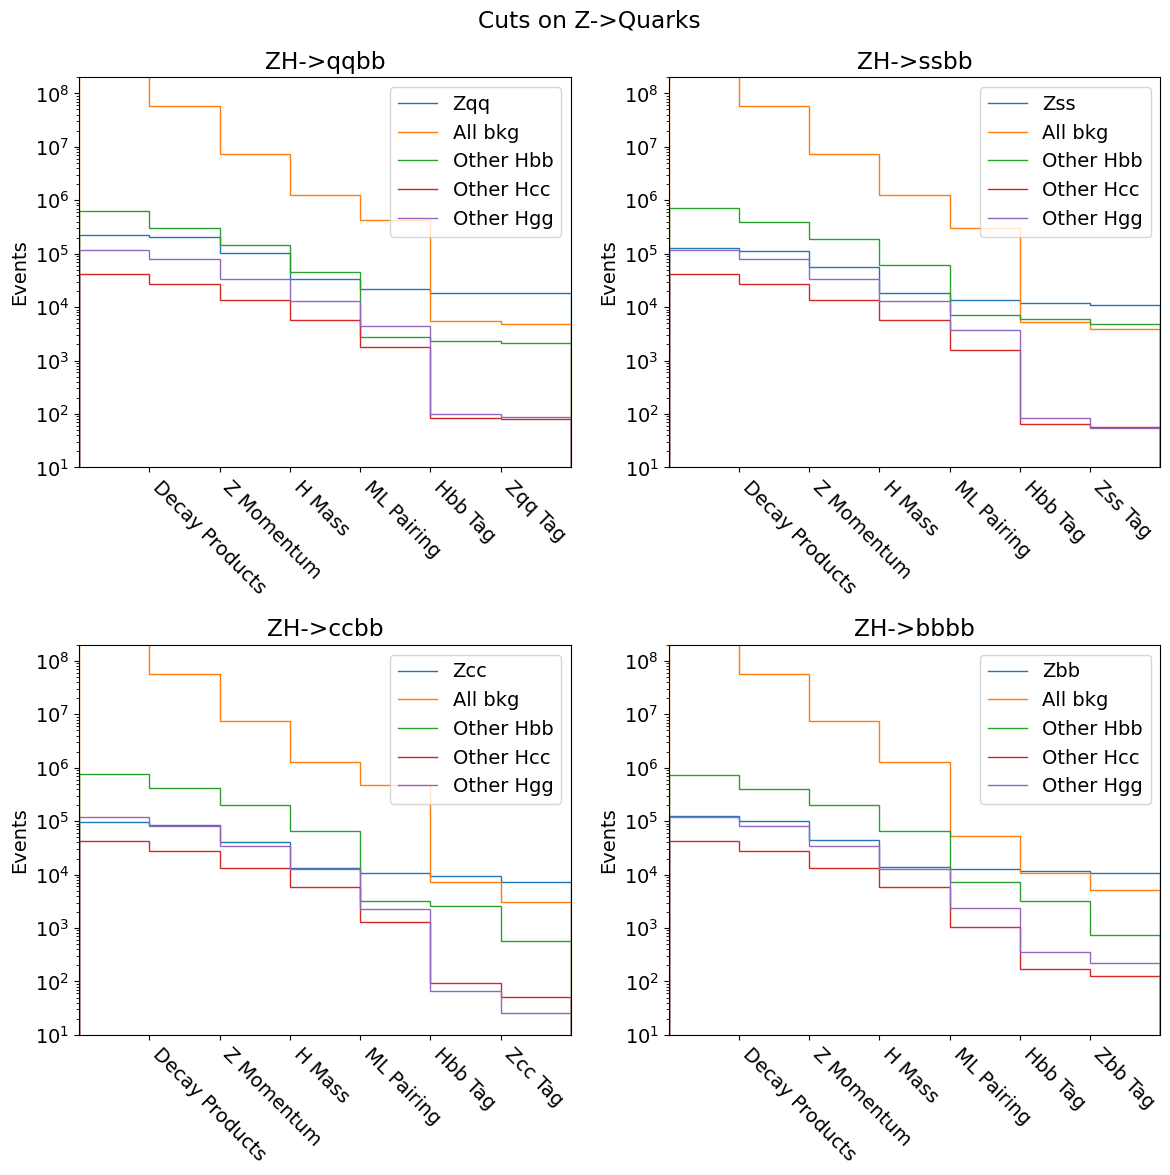

In [17]:
prods = ['qq', 'ss', 'cc', 'bb']

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2, 2, figsize=(12,12))

for i in range(2):
    for j in range(2):
        p = prods[i*2 + j]
        
        part = f_mumu[f'wzp6_ee_{p}H_H{flavour}_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        #WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        #ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        Bkg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in datasets_bkg])
        Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240', bb_sig)])
        Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',cc_sig)])
        Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',gg_sig)])
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        #ax[i][j].stairs(WW.values(), label='WW bkg')
        #ax[i][j].stairs(ZZ.values(), label='ZZ bkg')
        ax[i][j].stairs(Bkg.values(), label=f'All bkg')
        ax[i][j].stairs(Hbb.values(), label='Other Hbb')
        ax[i][j].stairs(Hcc.values(), label='Other Hcc')
        ax[i][j].stairs(Hgg.values(), label='Other Hgg')
        
        ax[i][j].legend(loc='upper right')
        ax[i][j].set_yscale('log')
        ax[i][j].set_ylim(10, 2e8)
        ax[i][j].set_title(f'ZH->{p}{flavour}')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=list(range(1, len(cuts[p]) + 1)),
                   labels=cuts[p],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))

plt.suptitle('Cuts on Z->Quarks')
plt.tight_layout()
plt.show()

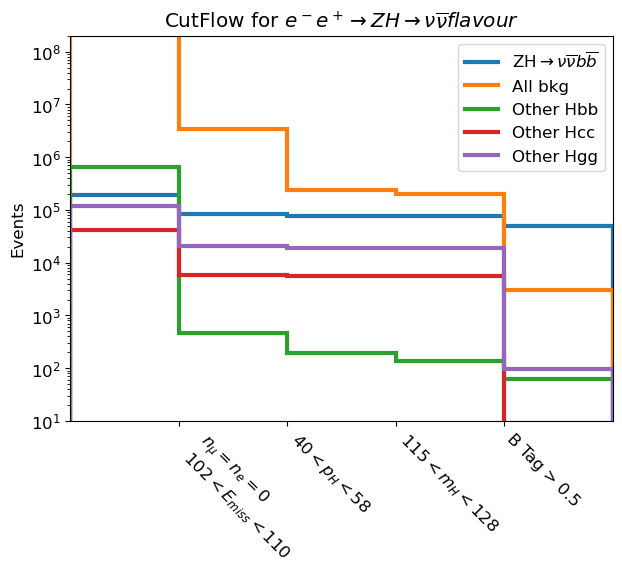

In [20]:
p = 'nunu'

cuts['nunu'] = ['$n_\\mu = n_e = 0$\n$102 < E_{miss} < 110$', '$40 < p_H < 58$', '$115 < m_H < 128$', 'B Tag > 0.5']

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(7, 5))
plt.tight_layout()

part = f_mumu[f'wzp6_ee_{p}H_H{flavour}_ecm240/cutFlow_{p}'].to_hist()
maxi = np.nonzero(part.values())[0][-1]
#WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
#ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
Bkg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in datasets_bkg])
Hbb = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240', bb_sig)])
Hcc = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',cc_sig)])
Hgg = reduce(lambda a, b : a + b, [f_mumu[x + f'/cutFlow_{p}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_H{flavour}_ecm240',gg_sig)])

plt.stairs(part.values(), label='ZH$\\rightarrow\\nu\\overline{\\nu}b\\overline{b}$', linewidth=3)
#plt.stairs(WW.values(), label='WW bkg', linewidth=3)
#plt.stairs(ZZ.values(), label='ZZ bkg', linewidth=3)
plt.stairs(Bkg.values(), label=f'All bkg', linewidth=3)
plt.stairs(Hbb.values(), label='Other Hbb', linewidth=3)
plt.stairs(Hcc.values(), label='Other Hcc', linewidth=3)
plt.stairs(Hgg.values(), label='Other Hgg', linewidth=3)

plt.legend(loc='upper right')
plt.yscale('log')
plt.ylim(10, 2e8)
plt.title('CutFlow for $e^-e^+ \\rightarrow ZH \\rightarrow \\nu\\overline{\\nu}{flavour}$')
plt.ylabel('Events')
plt.xlabel('')
plt.xticks(ticks=list(range(1, len(cuts[p]) + 1)),
           labels=cuts[p],
           rotation=-45, ha='left')
plt.xlim(0, maxi + 1)

plt.show()

<h1>Misc Graphs</h1>

In [41]:
z_products = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
g = 'hmuons_m'
ZZ = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
hists = [f_mumu[f'wzp6_ee_{i}H_Hbb_ecm240/{g}'].to_hist() for i in z_products]
hists.append(ZZ)
z_products.append('ZZ')
hep.histplot(hists, label=z_products)#, stack=True)
#plt.xlim(115,140)
plt.legend()
plt.xlim(100, 150)
plt.show()

KeyInFileError: not found: 'hmuons_m' (with any cycle number)

    Available keys: 'zmuons_h_m;1', 'zmuons_h_p;1', 'zbb_h_m;1', 'zcc_h_m;1', 'zss_z_m;1', 'zss_h_m;1', 'zqq_h_m;1', 'meta;1', 'zbb_z_m;1', 'zbb_h_p;1', 'zcc_z_m;1', 'zcc_h_p;1', 'zss_z_p;1', 'zss_h_p;1', 'zqq_z_m;1', 'zqq_h_p;1'...

in file /home/submit/jakedlee/FCCAnalyzer/end_of_h_bb.root

In [ ]:
p = 'nunu'
g = f'missingEnergy_nOne'

mumu =  f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/{g}'].to_hist()
WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 15})
hep.histplot([mumu, WW, ZZ, rest], label=['ZH$\\rightarrow\\nu\\overline{\\nu}b\\overline{b}$', 'WW bkg', 'ZZ bkg', 'Other Hbb'], yerr=False)
plt.vlines([102, 110], [10, 10], [2e7, 2e7], color='black', label='Cuts')
#hep.histplot(mumu, ZZ, yerr=False)
plt.legend(loc='upper left')
plt.title("ZH$\\rightarrow\\nu\\overline{\\nu}b\\overline{b}$ Missing Energy")
plt.ylabel("Events")
plt.xlabel("Missing Energy (GeV)")
plt.yscale('log')
plt.xlim(80,130)
plt.ylim(10, 2e7)
plt.show()

In [ ]:
p = 'ss'
g = f'Z{p}_prob_nOne'

mumu =  f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/{g}'].to_hist()
WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 15})
hep.histplot([mumu, WW, ZZ, rest], label=[f'Z{p}', 'WW bkg', 'ZZ bkg', 'Other Hbb'], yerr=False)
plt.vlines([102, 110], [10, 10], [2e7, 2e7], color='black', label='Cuts')
#hep.histplot(mumu, ZZ, yerr=False)
plt.legend(loc='upper left')
plt.title("Znunu Missing Energy")
plt.ylabel("Events")
plt.xlabel("Missing Energy (GeV)")
plt.yscale('log')
plt.xlim(0,1)
plt.show()

In [ ]:
g = f'zee_m_nOne'

mumu = f_mumu[f'wzp6_ee_mumuH_Hbb_ecm240/zmumu_m_nOne'].to_hist()
ee   = f_mumu[f'wzp6_ee_eeH_Hbb_ecm240/zee_m_nOne'].to_hist()
WW   = f_mumu[f'p8_ee_WW_ecm240/{g}'].to_hist()
ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/{g}'].to_hist()
rest = reduce(lambda a, b : a + b, [f_mumu[x + f'/{g}'].to_hist() for x in filter(lambda x : x != 'wzp6_ee_eeH_Hbb_ecm240' and x != 'wzp6_ee_mumuH_Hbb_ecm240', bb_sig)])
plt.rcParams.update({'font.size': 15})
hep.histplot([ee, mumu, WW, ZZ, rest], label=['Zee', 'Zmumu', 'WW bkg', 'ZZ bkg', 'Other Hbb'], yerr=False)
plt.vlines([85, 95], [10, 10], [1e5, 1e5], color='black', label='Cuts')
plt.legend(loc='upper left')
plt.title("Reconstructed Z Mass")
plt.ylabel("Events")
plt.xlabel("Mass (GeV)")
plt.yscale('log')
plt.xlim(70, 110) # get mean/rms values and plot them here
plt.ylim(10, 1e5)
plt.show()

In [ ]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_p_nOne'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/mumu_p_nOne'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/mumu_p_nOne'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.xlabel("Momentum (GeV)")
plt.legend()
plt.show()

In [ ]:
#zmumu_m_nOne
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
#ee   =  f_mumu['wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
#WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()
hep.histplot([mumu, ZZ], label=['Z$\mu\mu$', 'ZZ bkg'])
#hep.histplot(mumu, label='Z$\mu\mu$')
#hep.histplot(ee, label='Zee')
plt.legend()
plt.xlim((120,150))
#plt.ylim((0,50000))
#plt.yscale('log')
plt.xlabel("Recoil Mass (GeV)")
plt.show()

<h1>Flavour Tagging Scan</h1>

In [ ]:
df = uproot.open("/home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_bb.root")

def minmax(data):
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    return (data - min_val) / (max_val - min_val)

Zprods = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']
bb_sig = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in Zprods]
cc_sig = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in Zprods]
gg_sig = [f'wzp6_ee_{i}H_Hgg_ecm240' for i in Zprods]

def unnormalize(sample, hist, L=7200000):
    # w = L * sigma / Nevents
    w = L * df[sample + '/meta'].values()[2] / df[sample + '/meta'].values()[1]
    return df[sample + '/' + hist].values() / w

In [ ]:
p = 'mumu'
g = f"scanProb_{'muons' if p == 'mumu' else 'electrons'}"

plt.rcParams.update({'font.size': 16})

bkg_samples = list(filter(lambda x : x != f'wzp6_ee_{p}H_Hbb_ecm240', bb_sig)) + cc_sig + gg_sig + ['p8_ee_WW_ecm240', 'p8_ee_ZZ_ecm240']
L    = 7200000

def calc_dbkg(a, b):
    Nsel = unnormalize(a, b)[:20]
    Ntot = df[a + '/meta'].values()[1]
    sigm = df[a + '/meta'].values()[2]
    return (sigm * L * np.sqrt(Nsel * (Ntot - Nsel) / Ntot**3))**2

part    = np.array([0], dtype=np.float64)
bkg     = np.array([0], dtype=np.float64)
bkg_raw = np.array([0], dtype=np.float64)

for i in range(3):
    part    = np.append(part, df[f'wzp6_ee_{p}H_Hbb_ecm240/{g}{i}'].values()[:20])
    bkg     = np.append(bkg, reduce(lambda a, b : a + b, [df[x + f'/{g}{i}'].values()[:20] for x in bkg_samples]))
    bkg_raw = np.append(bkg_raw, reduce(lambda a, b : a + b, [calc_dbkg(x, f'{g}{i}') for x in bkg_samples]))

def uncert(i):
    Nobs = part[i] + bkg[i]
    Nbkg = bkg[i]
    A    = part[i] / (L * df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[2])
    E    = 1
    
    dNobs = 1 / np.sqrt(Nobs)
    dNbkg = np.sqrt(bkg_raw[i])
    dA    = np.sqrt(A * (1 - A) / df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[1])
    dL    = 0.3e-6
    
    xsec  = (Nobs - Nbkg) / (A*E*L)
    dxsec = np.sqrt((dNbkg/(A*E*L))**2 + (dNobs/(A*E*L))**2 + (dA*xsec/A)**2 + (dL*xsec/L)**2)
    
    return dxsec

x = [0.005*i + 0.7 for i in range(0, 60)]
y = [uncert(i) for i in range(0, 60)] 

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].plot(x, y)
ax[0].set_title(f'Z{p} Cross Section Uncertainty')
ax[0].set_ylabel('Uncertainty (pb)')
ax[0].set_xlabel('B Tag Threshold')
#ax[0].set_xlim((0.7, 0.985))

ax[1].plot(x, part[part != 0], label=f'Z{p}')
ax[1].plot(x, bkg[part != 0], label=f'bkg')
ax[1].set_title('Events vs Cut Threshold')
ax[1].set_yscale('log')
ax[1].set_ylabel('Events')
ax[1].set_xlabel('B Tag Threshold')
#ax[1].set_xlim((0.7, 0.985))
ax[1].legend(loc='lower left')

#plt.suptitle(f'B Tag Cut on ZH->{p}bb')
plt.tight_layout()
plt.show()

In [ ]:
p = 'cc'

bb = [f'wzp6_ee_{i}H_Hbb_ecm240' for i in filter(lambda j : j != p, ['mumu', 'bb', 'cc', 'ss', 'qq'])]
cc = [f'wzp6_ee_{i}H_Hcc_ecm240' for i in ['mumu', 'bb', 'cc', 'ss', 'qq']]
gg = [f'wzp6_ee_{i}H_Hgg_ecm240' for i in ['mumu', 'bb', 'cc', 'ss', 'qq']]
bkg_samples = bb + cc + gg + ['p8_ee_WW_ecm240', 'p8_ee_ZZ_ecm240']

#xbkg = reduce(np.append, [minmax(df[f'{i}/Hbb_prob_vs_Z{p}_prob'].values()[0]) for i in bkg_samples])
#ybkg = reduce(np.append, [minmax(df[f'{i}/Hbb_prob_vs_Z{p}_prob'].values()[1]) for i in bkg_samples])

xsig = minmax(df[f'wzp6_ee_{p}H_Hbb_ecm240/Hbb_prob_vs_Z{p}_prob'].values()[0])
ysig = minmax(df[f'wzp6_ee_{p}H_Hbb_ecm240/Hbb_prob_vs_Z{p}_prob'].values()[1])

def uncert(cutH, cutZ):
    L    = 7200000
    
    Nsig = xsig[~(np.isnan(xsig)) & ~(np.isnan(ysig)) & (xsig > cutH) & (ysig > cutZ)].size
    nsig = L * df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[2] * Nsig / df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[1]
    
    nbkg  = 0
    dNbkg = 0
    for i in bkg_samples:
        xbkg = minmax(df[f'{i}/Hbb_prob_vs_Z{p}_prob'].values()[0])
        ybkg = minmax(df[f'{i}/Hbb_prob_vs_Z{p}_prob'].values()[1])
        
        temp = xbkg[~(np.isnan(xbkg)) & ~(np.isnan(ybkg)) & (xbkg > cutH) & (ybkg > cutZ)].size
        
        nbkg += temp * L * df[f'{i}/meta'].values()[2] / df[f'{i}/meta'].values()[1]
        
        Nsel = temp
        Ntot = df[f'{i}/meta'].values()[1]
        
        dNbkg += (L*df[f'{i}/meta'].values()[2]*np.sqrt(Nsel*(Ntot - Nsel) / Ntot**3))**2 
    dNbkg = np.sqrt(dNbkg)
    
    A    = Nsig / df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[1]
    E    = 1
    Nobs = nsig + nbkg
    
    dNobs = 1 / np.sqrt(Nobs)
    dA    = np.sqrt(A * (1 - A) / df[f'wzp6_ee_{p}H_Hbb_ecm240/meta'].values()[1])
    dL    = 0.3e-6
    
    xsec  = (Nobs - nbkg) / (A*E*L)
    dxsec = np.sqrt((dNbkg/(A*E*L))**2 + (dNobs/(A*E*L))**2 + (dA*xsec/A)**2 + (dL*xsec/L))
    
    return dxsec / xsec

res = 95
x = np.linspace(0, 0.95, res)
y = np.linspace(0, 0.95, res)
X, Y = np.meshgrid(x, y)
sigma = np.zeros((res, res))
for i in range(res):
    for j in range(res):
        sigma[i][j] = uncert(x[i], y[j])
sigma = np.log(sigma)

In [ ]:
plt.contourf(X, Y, sigma, levels=500, cmap='hot')

plt.title("ZH$\\rightarrow c\\overline{c}b\\overline{b}$ Cross Section Uncertainty\n(After ML Flavour Assignment)")
plt.xlabel("Z$c\\overline{c}$ Tag Threshold")
plt.ylabel("H$b\\overline{b}$ Tag Threshold")

[minx], [miny] = np.where(sigma == np.min(sigma))
print(x[minx], y[miny], uncert(x[minx], y[miny]), uncert(x[miny], y[minx]))
plt.scatter(y[miny], x[minx], color=(0,1,0), marker='x', linewidth=3, s=10**2)

#plt.colorbar(label='Log Uncertainty')
plt.show()

In [ ]:
uncert(0.042, 0.011)

B tag X tag

bb: 0.011 0.042

cc: 0.029 0.134

ss: 0.032 0.095

qq: 0.032 0.053

In [ ]:
x   = np.linspace(0, 0.95, 100)
sig = np.zeros(100)

for i in range(100):
    sig[i] = uncert(x[i], 0.134)

plt.plot(x, sig)
plt.xlim(0, 0.95)
plt.ylabel('Uncertainty')
#plt.yticks([])
plt.xlabel('H Dijet B Tag Cut')
plt.title('Cross Section Uncertainty vs H Dijet B Tagging Confidence')

plt.show()

# second run
# B: 0.67 Q: 0.80
# B: 0.77 S: 0.45
# B: 0.80 C: 0.04
# B: 0.60 B: 0.00

<h1>Fitting & Cross Section</h1>

In [4]:
import ROOT

def breit_wigner(x, par):
    return par[0] * ROOT.TMath.BreitWigner(x[0], par[1], par[2])

fIn = ROOT.TFile("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root") # make cross section table
h = fIn.Get("wzp6_ee_mumuH_Hbb_ecm240/zmuons_final_recoil_m")
xMin, xMax = 100, 140

rel_bwTF1 = ROOT.TF1("rel_bwTF1", breit_wigner, xMin, xMax, 3)
rel_bwTF1.SetParameters(h.Integral(), 125.11, 4.07e-3)
rel_bwTF1.FixParameter(1, 125.11);
h.Fit("rel_bwTF1", "R")

canvas = ROOT.TCanvas("canvas", "Canvas", 800, 600)
h.Draw()
rel_bwTF1.Draw("same")
canvas.SaveAs("bw.png")

Welcome to JupyROOT 6.30/02


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        25751
NDf                       =            7
Edm                       =   6.4899e-07
NCalls                    =          611
p0                        =      14105.5   +/-   338.309     
p1                        =       125.11                      	 (fixed)
p2                        =     0.329599   +/-   0.0100079   


Info in <TCanvas::Print>: png file bw.png has been created


In [27]:
def unnormalize(sample, hist, L=7200000):
    # w = L * sigma / Nevents
    w = L * f_mumu[sample + '/meta'].values()[2] / f_mumu[sample + '/meta'].values()[1]
    return f_mumu[sample + '/' + hist].values() / w

def getWeight(sample, L=7200000):
    # w = L * sigma / Nevents
    w = L * f_mumu[sample + '/meta'].values()[2] / f_mumu[sample + '/meta'].values()[1]
    return w

def xsec(decay_product):
    datasets_bkg = ["p8_ee_WW_ecm240", "p8_ee_ZZ_ecm240", "wzp6_ee_mumu_ecm240", "wzp6_ee_tautau_ecm240", "wzp6_egamma_eZ_Zmumu_ecm240", "wzp6_gammae_eZ_Zmumu_ecm240", "wzp6_gaga_mumu_60_ecm240", "wzp6_gaga_tautau_60_ecm240", "wzp6_ee_nuenueZ_ecm240"]
    bkg_samples = list(filter(lambda x : x != f'wzp6_ee_{decay_product}H_H{flavour}_ecm240', bb_sig)) + list(filter(lambda x : x != f'wzp6_ee_{decay_product}H_H{flavour}_ecm240',cc_sig)) + list(filter(lambda x : x != f'wzp6_ee_{decay_product}H_H{flavour}_ecm240',gg_sig)) + datasets_bkg
    L = 7200000
    
    nums = f_mumu[f'wzp6_ee_{decay_product}H_H{flavour}_ecm240/cutFlow_{decay_product}'].values()  # cutflow for decay product
    maxi = np.nonzero(nums)[0][-1]   #final cutflow index
    nsig = nums[maxi]  # final cutflow value for decay product
    nbkg = sum([f_mumu[x + f'/cutFlow_{decay_product}'].values()[maxi] for x in bkg_samples])  #sum of background final cutflow values
    nobs = nsig + nbkg 
    A    = nums[maxi] / (L * f_mumu[f'wzp6_ee_{decay_product}H_H{flavour}_ecm240/meta'].values()[2])  # nsig/L*xsec = nsig/ninitialsig
    a    = nums[2]/ nums[0]
    e    = nums[maxi] / nums[2]
    w = getWeight(f'wzp6_ee_{decay_product}H_H{flavour}_ecm240')
    
    xsec = (nobs - nbkg) / (A*L)
    
    dNobs = 1 / np.sqrt(nobs)
    dNbkg = np.sqrt(sum([(L * f_mumu[x + '/meta'].values()[2] * np.sqrt(unnormalize(x, f'cutFlow_{decay_product}')[maxi] * (f_mumu[x + '/meta'].values()[1] - unnormalize(x, f'cutFlow_{decay_product}')[maxi]) / f_mumu[x + '/meta'].values()[1]**3))**2 for x in bkg_samples]))
    dA    = np.sqrt(A * (1-A) / f_mumu[f'wzp6_ee_{decay_product}H_H{flavour}_ecm240/meta'].values()[1])
    da = np.sqrt(a * (1-a)*w / nums[0])
    de = np.sqrt(e * (1-e)*w / nums[2])
    dL    = 0.3e-6
    
    newdA = np.sqrt((da*e)**2 + (de*a)**2) # see if equals dA
    
    dxsec = np.sqrt((dNobs/(A*L))**2 + (dNbkg/(A*L))**2 + (dA*xsec/A)**2 + (dL*xsec/L)**2)
    
    
    print("sample weight:", w,)      
    print("a: ", a, " +- ", da, ", e: ", e, " +- ", de)
    print("Total Acceptance:", A, "+-", dA, "\nNsig:", nsig, "\nNbkg:", nbkg, "+-", dNbkg, "\nnobs:", nobs, "+-", dNobs)
    #print("dNobs", dNobs, "dNbkg", dNbkg, "dA", dA)
    print(f"ee->ZH->{decay_product}{flavour} Cross Section: {xsec*1000:.2f} +- {dxsec*1000:.3f} fb ({100*dxsec / xsec:.2f}%)")
    
    return xsec, dxsec

In [29]:
print("----------------------\n\tmumu\n----------------------")
x1, a = xsec("mumu")
print("----------------------\n\tee\n----------------------")
x2, b = xsec("ee")
print("----------------------\n\tnunu\n----------------------")
x3, c = xsec("nunu")
print("----------------------\n\tbb\n----------------------")
x4, d = xsec("bb")
print("----------------------\n\tcc\n----------------------")
x5, e = xsec("cc")
print("----------------------\n\tss\n----------------------")
x6, f = xsec("ss")
print("----------------------\n\tqq\n----------------------")
x7, g = xsec("qq")

print("----------------------\n\tTotal\n----------------------")
xtot  = x1 + x2 + x3 + x4 + x5 + x6 + x7
dxtot = np.sqrt(a**2 + b**2 + c**2 + d**2 + e**2 + f**2 + g**2)
print(f"ee->ZH->stuff_{flavour} Cross Section: {1000*xtot:.2f} +- {1000*dxtot:.3f} fb ({100 * dxtot / xtot:.2f}%)")

----------------------
	mumu
----------------------
sample weight: 0.01407600031234324
a:  0.88621  +-  0.0010042003579963511 , e:  0.37111971203213684  +-  0.0016228286981468402
Total Acceptance: 0.32889 +- 0.0014856694379975649 
Nsig: 462.9455742726568 
Nbkg: 1246.6255462629392 +- 69.77529628002696 
nobs: 1709.571120535596 +- 0.024185574812684303
ee->ZH->mumucc Cross Section: 0.20 +- 0.029 fb (15.08%)
----------------------
	ee
----------------------
sample weight: 0.014918400440365076
a:  0.8585  +-  0.0011021694515817428 , e:  0.33840419336051253  +-  0.0016148942574495536
Total Acceptance: 0.29052 +- 0.0014356814744225128 
Nsig: 433.4093695934862 
Nbkg: 579.8076031824157 +- 41.66786499925811 
nobs: 1013.2169727759019 +- 0.03141584690661694
ee->ZH->eecc Cross Section: 0.21 +- 0.020 fb (9.63%)
----------------------
	nunu
----------------------
sample weight: 0.09619200322777033
a:  0.57678  +-  0.0015623854569215628 , e:  0.550227122993169  +-  0.0020713931331465527
Total Acceptanc

ee->ZH->mumubb Cross Section: 3.94 +- 0.011 fb (0.29%)

ee->ZH->eebb Cross Section: 4.17 +- 0.010 fb (0.25%)

ee->ZH->nunubb Cross Section: 26.90 +- 0.042 fb (0.16%)

ee->ZH->bbbb Cross Section: 17.45 +- 0.326 fb (1.87%)

ee->ZH->ccbb Cross Section: 13.59 +- 0.162 fb (1.19%)

ee->ZH->ssbb Cross Section: 17.45 +- 0.218 fb (1.25%)

ee->ZH->qqbb Cross Section: 31.07 +- 0.292 fb (0.94%)

ee->ZH->stuff Cross Section: 114.57 +- 0.516 fb (0.45%)







ee->ZH->mumubb Cross Section: 3.94 +- 0.012 fb (0.30%)
ee->ZH->eebb Cross Section: 4.17 +- 0.011 fb (0.27%)
ee->ZH->nunubb Cross Section: 26.90 +- 0.043 fb (0.16%)
ee->ZH->bbbb Cross Section: 17.45 +- 0.269 fb (1.54%)
ee->ZH->ccbb Cross Section: 13.59 +- 0.178 fb (1.31%)
ee->ZH->ssbb Cross Section: 17.45 +- 0.245 fb (1.40%)
ee->ZH->qqbb Cross Section: 31.07 +- 0.317 fb (1.02%)





ee->ZH->mumubb Cross Section: 0.00394 +- 0.0027432519475296957
ee->ZH->eebb Cross Section: 0.004171 +- 0.0024606667928812427
ee->ZH->nunubb Cross Section: 0.026899999999999997 +- 0.0014778926767689588
ee->ZH->bbbb Cross Section: 0.01745 +- 0.0183934902955624
ee->ZH->ccbb Cross Section: 0.013590000000000001 +- 0.012027530255229981
ee->ZH->ssbb Cross Section: 0.01745 +- 0.02143603607292202
ee->ZH->qqbb Cross Section: 0.03107 +- 0.009315990848536801

In [ ]:
0.269/17.45

In [29]:
f_mumu = uproot.open("/home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_bb.root")
#print(f_mumu.keys())

In [27]:
def unnormalize(sample, hist, L=7200000):
    # w = L * sigma / Nevents
    w = L * f_mumu[sample + '/meta'].values()[2] / f_mumu[sample + '/meta'].values()[1]
    return f_mumu[sample + '/' + hist].values() / w

def xsec(decay_product):
    bkg_samples = list(filter(lambda x : x != f'wzp6_ee_{decay_product}H_Hbb_ecm240', bb_sig)) + ['p8_ee_WW_ecm240', 'p8_ee_ZZ_ecm240']
    L = 7200000
    
    nums = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow'].values()
    maxi = np.nonzero(nums)[0][-1]
    nsig = nums[maxi]
    nbkg = sum([f_mumu[f'{x}/cutFlow'].values()[maxi] for x in bkg_samples])
    nobs = nsig + nbkg
    A    = nums[maxi] / (L * f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/meta'].values()[2])
    E    = 1
    
    xsec = (nobs - nbkg) / (A*E*L)
    
    dNobs = 1 / np.sqrt(nobs)
    dNbkg = np.sqrt(sum([(L * f_mumu[x + '/meta'].values()[2] * np.sqrt(unnormalize(x, f'cutFlow')[maxi] * (f_mumu[x + '/meta'].values()[1] - unnormalize(x, f'cutFlow')[maxi]) / f_mumu[x + '/meta'].values()[1]**3))**2 for x in bkg_samples]))
    dA    = np.sqrt(A * (1-A) / f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/meta'].values()[1])
    dL    = 0.3e-6
    dxsec = np.sqrt((dNobs/(A*E*L))**2 + (dNbkg/(A*E*L))**2 + (dA*xsec/A)**2 + (dL*xsec/L)**2)
    print("Acceptance:", A, "\nEfficiency:", E, "\nNsig:", nsig, "\nNbkg:", nbkg)
    print("dNobs", dNobs, "dNbkg", dNbkg, "dA", dA)
    print(f"ee->ZH->{decay_product}bb Cross Section: {xsec*1000:.2f} +- {dxsec*1000:.3f} fb ({100*dxsec / xsec:.2f}%)")
    
    return xsec, dxsec

In [28]:
xsec('mumu')

KeyInFileError: not found: 'cutFlow' (with any cycle number)

    Available keys: 'cutFlow_ee;1', 'cutFlow_qq;1', 'cutFlow_ss;1', 'cutFlow_cc;1', 'cutFlow_bb;1', 'cutFlow_mumu;1', 'cutFlow_nunu;1', 'meta;1', 'zcc_z_m;1', 'zcc_h_m;1', 'zcc_z_p;1', 'zcc_h_p;1', 'zmuons_h_m;1', 'zmuons_h_p;1'...

in file /home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_bb.root

<h1>Analysis of WW Background</h1>

In [34]:
df = uproot.open("/home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_bb.root")
#print(df.keys())

In [25]:
hep.histplot(df['p8_ee_WW_ecm240/missingEnergy'].to_hist())
plt.xlim(0, 50)
plt.vlines(30, 0, 800000, color='orange')
plt.show()

KeyInFileError: not found: 'missingEnergy' (with any cycle number)

    Available keys: 'missingEnergy_nOne;1', 'meta;1', 'zee_m_nOne;1', 'mumu_p_nOne;1', 'ee_p_nOne;1', 'Zss_prob_nOne;1', 'zss_z_m;1', 'zss_h_m;1', 'zss_z_p;1', 'zss_h_p;1', 'zmumu_m_nOne;1', 'zbb_z_m;1', 'zbb_h_m;1', 'zcc_z_m;1'...

in file /home/submit/aniketkg/FCCAnalyzer/analyses/h_bb/end_of_h_bb.root

In [ ]:
hep.histplot(df['p8_ee_WW_ecm240/mumu_recoil_m_nOne'].to_hist())
plt.xlim(100, 150)
plt.vlines([122, 127], [0, 0], [25000, 25000], colors=['orange', 'orange'])
plt.show()

In [ ]:
me = df['p8_ee_WW_ecm240/missingEnergy_vs_zmumu_recoil_m'].values()[0]
re = df['p8_ee_WW_ecm240/zmumu_recoil_m_vs_missingEnergy'].values()[0]

plt.scatter(me, re, marker='.')

plt.title("Uncut WW Background Events")
plt.xlabel("Missing Energy")
plt.ylabel("Recoil Mass")

plt.gca().add_patch(Rectangle((0, 122), 30, 5, edgecolor='orange', fill=False, label='Cuts'))

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.legend()
plt.show()